In [103]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

## SVD calculation

In [104]:
U, sigma, VT = np.linalg.svd([[1, 1], [7, 7]])
print(U)
print(sigma) # vector for saving space
print(VT)

[[-0.14142136 -0.98994949]
 [-0.98994949  0.14142136]]
[ 10.   0.]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [105]:
def loadExData():
    return[[0, 0, 0, 2, 2],
           [0, 0, 0, 3, 3],
           [0, 0, 0, 1, 1],
           [1, 1, 1, 0, 0],
           [2, 2, 2, 0, 0],
           [5, 5, 5, 0, 0],
           [1, 1, 1, 0, 0]]

In [12]:
data = loadExData()
print("data", data)
U, sigma, VT = np.linalg.svd(data)
print("U", U)
print("sigma", sigma)
print("VT", VT)

# reconstruction
sig3 = np.mat([[sigma[0], 0, 0], [0, sigma[1], 0], [0, 0, sigma[2]] ])
reconMat = U[:,:3] * sig3 * VT[:3,:]
print("reconMat", reconMat.A)

('data', [[0, 0, 0, 2, 2], [0, 0, 0, 3, 3], [0, 0, 0, 1, 1], [1, 1, 1, 0, 0], [2, 2, 2, 0, 0], [5, 5, 5, 0, 0], [1, 1, 1, 0, 0]])
('U', array([[ -2.22044605e-16,   5.34522484e-01,   8.41641151e-01,
         -1.37443101e-02,  -7.57428665e-02,  -1.11022302e-16,
          1.38777878e-17],
       [  0.00000000e+00,   8.01783726e-01,  -4.92426901e-01,
         -2.47257115e-01,   2.31349353e-01,   3.15719673e-16,
         -2.77555756e-17],
       [  0.00000000e+00,   2.67261242e-01,  -2.06001597e-01,
          7.69259966e-01,  -5.42562325e-01,  -7.55450741e-16,
          1.09551769e-16],
       [ -1.79605302e-01,   2.77555756e-17,  -3.00520660e-02,
         -2.15935735e-01,  -2.94749442e-01,   9.05439185e-01,
         -1.16246358e-01],
       [ -3.59210604e-01,   5.55111512e-17,  -6.01041319e-02,
         -4.31871470e-01,  -5.89498885e-01,  -4.19124526e-01,
         -3.97074256e-01],
       [ -8.98026510e-01,   0.00000000e+00,   3.60624791e-02,
          2.59122882e-01,   3.53699331e-01,   5

## collaborative filtering based recomendation system

In [13]:
# similarity function

def eulidSim(inA, inB):
    return 1.0 / (1.0 + np.linalg.norm(inA - inB))

def pearsSim(inA, inB):
    if len(inA) < 3:
        return 1.0
    return 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar=0)[0][1] # map [-1,1] to [0, 1]

def cosSim(inA, inB):
    num = float(np.sum(inA * inB))
    denom = np.linalg.norm(inA) * np.linalg.norm(inB)
    return 0.5 + 0.5 * (num / denom) # map [-1, 1] to [0,1]

In [19]:
dataArr = np.array([[2, 0, 0, 4, 4], [5, 5, 5, 3, 3], [2, 4, 2, 1, 2]])
dataArr.shape
print("eulidSum: ")
print(eulidSim(dataArr[:,3], dataArr[:,4]))
print(eulidSim(dataArr[:,0], dataArr[:,4]))
print("pearsSim: ")
print(pearsSim(dataArr[:,3], dataArr[:,4]))
print(pearsSim(dataArr[:,0], dataArr[:,4]))
print("cosSim: ")
print(cosSim(dataArr[:,3], dataArr[:,4]))
print(cosSim(dataArr[:,0], dataArr[:,4]))

eulidSum: 
0.5
0.261203874964
pearsSim: 
0.990990253031
0.5
cosSim: 
0.991641002492
0.936393024089


## A real case : food recomendation

### recomend food 

In [84]:
def standarEstimate(dataArr, userId, simFunc, itemId):
    n = dataArr.shape[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    for j in range(n): # traverse for each feature which have been rated by user 
        userRating = dataArr[userId, j]
        #print(userId, j, userRating)
        if userRating == 0 or j == itemId:
            continue
        
        overLap = np.nonzero(np.logical_and(dataArr[:, itemId]>0, dataArr[:, j]>0))[0]
        #print(overLap)
        if(len(overLap) == 0):
            similarity = 0
        else:
            similarity = simFunc(dataArr[overLap, itemId], dataArr[overLap, j])
        
        #print("the %d and %d similarity is : %f" % (itemId, j, similarity) )
        simTotal += similarity
        ratSimTotal += userRating * similarity
    
    if simTotal == 0.0:
        return 0
    else:
        return ratSimTotal / simTotal

def recomend(dataArr, userId, N=3, simFunc = cosSim, estMethod=standarEstimate):
    unratedItemInds = np.nonzero(dataArr[userId,:] == 0)[0]
    print(unratedItemInds)
    if len(unratedItemInds) == 0:
        return 'you rated everything'
    
    itemScores = []
    for itemId in unratedItemInds:
        estScore = estMethod(dataArr, userId, simFunc, itemId)
        itemScores.append((itemId, estScore))
    
    itemScoresSorted = sorted(itemScores, key=lambda p: p[1], reverse=True)
    return itemScoresSorted[:N]

In [86]:
dataArr = [[4, 4, 0, 2, 2],
           [4, 0, 0, 3, 3], 
           [4, 0, 0, 1, 1],
           [1, 1, 1, 2, 0],
           [2, 2, 2, 0, 0],
           [1, 1, 1, 0, 0],
           [5, 5, 5, 0, 0]]
dataArr = np.array(dataArr)
print(dataArr.shape)
print("cosSim")
scoreList = recomend(dataArr, 2)
print(scoreList)

print("eulidSim)")
scoreList = recomend(dataArr, 2, simFunc=eulidSim)
print(scoreList)

print("pearsSim")
scoreList = recomend(dataArr, 2, simFunc=pearsSim)
print(scoreList)

(7, 5)
cosSim
[1 2]
[(2, 2.5), (1, 2.0243290220056256)]
eulidSim)
[1 2]
[(2, 3.0), (1, 2.8266504712098603)]
pearsSim
[1 2]
[(2, 2.5), (1, 2.0)]


### improve performance by SVD

In [99]:
def svdEstimate(dataArr, userId, simFunc, itemId):
    dataMat = np.mat(dataArr)
    n = dataArr.shape[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    U, Sigma, VT = np.linalg.svd(np.mat(dataArr))
    sigCumsum = np.cumsum(Sigma**2/np.sum(Sigma**2))
    
    reduceN = 0
    for i in range(len(sigCumsum)):
        if sigCumsum[i] > 0.90:
            reduceN = i + 1
            break
    
    SigmaN = np.mat(np.eye(reduceN)*Sigma[:reduceN])
    xformedItems = dataMat.T * U[:, :reduceN] * SigmaN.I
    xformedItems = xformedItems.A
    for j in range(n):
        userRating = dataArr[userId, j]
        if userRating == 0 or j == itemId:
            continue
            
        #print(xformedItems[itemId,:])
        #print(xformedItems[j, :])
        similarity = simFunc(xformedItems[itemId,:].T, xformedItems[j,:].T)
        print("the %d and %d similarity is : %f" % (itemId, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal / simTotal

In [88]:
def loadExData2():
    return[[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
           [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
           [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
           [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
           [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
           [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
           [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]]

In [89]:
dataArr = np.array(loadExData2())
dataArr.shape

(11, 11)

In [100]:
recomend(dataArr, 1, estMethod=svdEstimate)

[0 1 2 4 6 7 8 9]
the 0 and 3 similarity is : 0.485722
the 0 and 5 similarity is : 0.486944
the 0 and 10 similarity is : 0.517241
the 1 and 3 similarity is : 0.484158
the 1 and 5 similarity is : 0.485385
the 1 and 10 similarity is : 0.515683
the 2 and 3 similarity is : 0.484789
the 2 and 5 similarity is : 0.486017
the 2 and 10 similarity is : 0.516315
the 4 and 3 similarity is : 0.488043
the 4 and 5 similarity is : 0.479187
the 4 and 10 similarity is : 0.478511
the 6 and 3 similarity is : 0.928889
the 6 and 5 similarity is : 0.924259
the 6 and 10 similarity is : 0.922822
the 7 and 3 similarity is : 0.488958
the 7 and 5 similarity is : 0.489308
the 7 and 10 similarity is : 0.519452
the 8 and 3 similarity is : 0.490173
the 8 and 5 similarity is : 0.491386
the 8 and 10 similarity is : 0.521681
the 9 and 3 similarity is : 0.512438
the 9 and 5 similarity is : 0.503579
the 9 and 10 similarity is : 0.502871


[(6, 3.3329499901459845), (9, 3.331544717872839), (4, 3.3314474877128615)]

In [101]:
recomend(dataArr, 1, simFunc=eulidSim, estMethod=svdEstimate)

[0 1 2 4 6 7 8 9]
the 0 and 3 similarity is : 0.617776
the 0 and 5 similarity is : 0.559356
the 0 and 10 similarity is : 0.565443
the 1 and 3 similarity is : 0.642742
the 1 and 5 similarity is : 0.574987
the 1 and 10 similarity is : 0.580252
the 2 and 3 similarity is : 0.612547
the 2 and 5 similarity is : 0.555860
the 2 and 10 similarity is : 0.562054
the 4 and 3 similarity is : 0.543297
the 4 and 5 similarity is : 0.504578
the 4 and 10 similarity is : 0.503755
the 6 and 3 similarity is : 0.790208
the 6 and 5 similarity is : 0.674235
the 6 and 10 similarity is : 0.672206
the 7 and 3 similarity is : 0.613964
the 7 and 5 similarity is : 0.556923
the 7 and 10 similarity is : 0.563111
the 8 and 3 similarity is : 0.612877
the 8 and 5 similarity is : 0.556507
the 8 and 10 similarity is : 0.562790
the 9 and 3 similarity is : 0.559882
the 9 and 5 similarity is : 0.518984
the 9 and 10 similarity is : 0.518104


[(4, 3.3251923577254852), (9, 3.3249807281901855), (8, 3.3212767383990696)]

## A real case: image compress

In [145]:
def printArr(inArr, threshold=0.8):
    m, n = inArr.shape
    for i in range(m):
        sprint = ''
        for j in range(n):
            if float(inArr[i,j]) > threshold:
                sprint += '1'
            else:
                sprint += '0'
        print(sprint)

In [154]:
# load data
DATA_DIR = '../data/svd/'
fr = open(DATA_DIR+'0_5.txt')
img = []
for line in fr.readlines():
    line = line.strip()
    newRow = []
    for i in range(len(line)):
        newRow.append(int(line[i]))
    img.append(newRow)
img = np.array(img)
print(img.shape)
print("original matrix:")
printArr(img)

(32, 32)
original matrix:
00000000000000110000000000000000
00000000000011111100000000000000
00000000000111111110000000000000
00000000001111111111000000000000
00000000111111111111100000000000
00000001111111111111110000000000
00000000111111111111111000000000
00000000111111100001111100000000
00000001111111000001111100000000
00000011111100000000111100000000
00000011111100000000111110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000001111110000000001111000000
00000011111110000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000001111100000000011111000000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000011111000000
00000000111110000000111111000000
00000000111111000001111110000000
00000000011111111111111110000000
00000000001111111111111110000000
00000000001111111111111110000000
00000000000111111

[ 0.62849327  0.84809829  0.89044201  0.92225372  0.94346124  0.95239395
  0.96067484  0.96848838  0.9743196   0.97943047  0.98408721  0.98787129
  0.99125731  0.99391059  0.99555759  0.99702034  0.99832518  0.99921147
  0.9996952   1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]


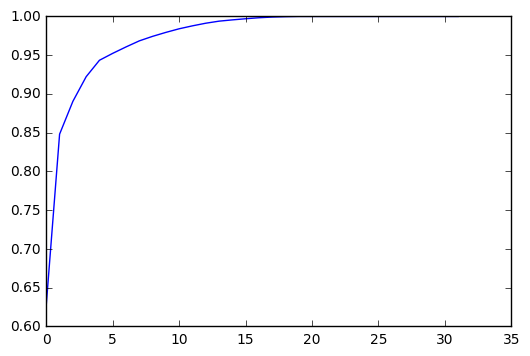

In [159]:
U, Sigma, VT = np.linalg.svd(np.mat(img))
sigmaCumsum = np.cumsum(Sigma**2 / np.sum(Sigma**2))
print( sigmaCumsum )
plt.plot(sigmaCumsum)

In [166]:
## reconstruction
numSV = 4
SigmaRecon = np.zeros((numSV, numSV))
for i in range(numSV):
    SigmaRecon[i,i] = Sigma[i]

reconMat = U[:,:numSV] * SigmaRecon * VT[:numSV,:]
print("reconstruction image: ")
printArr(reconMat.A)

reconstruction image: 
00000000000000000000000000000000
00000000000000111100000000000000
00000000000000111110000000000000
00000000000011111110000000000000
00000000000111111111000000000000
00000000001101111111110000000000
00000000001111111111110000000000
00000000011111000001111100000000
00000000111100000000111100000000
00000001111100000000011100000000
00000011111100000000011100000000
00000011111100000000001100000000
00000011111100000000001100000000
00000000111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001110000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001110000000
00000000111110000000111100000000
00000000001111111111111000000000
00000000001111111111110000000000
00000000001111111111110000000000
00000000000011111111